# Load Dataset

In [1]:
import numpy as np
import pandas as pd
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# X & y

In [7]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)
# Create y (the target column)
y = heart_disease["target"]

In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Data Cleaning

# Splitting

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

# Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [11]:
# View the current hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Fit

In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier()

# Predict

In [13]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2


In [14]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X_test)

# Evaluate 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        35
           1       0.97      0.85      0.91        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.92      0.91      0.91        76



In [19]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[34,  1],
       [ 6, 35]])

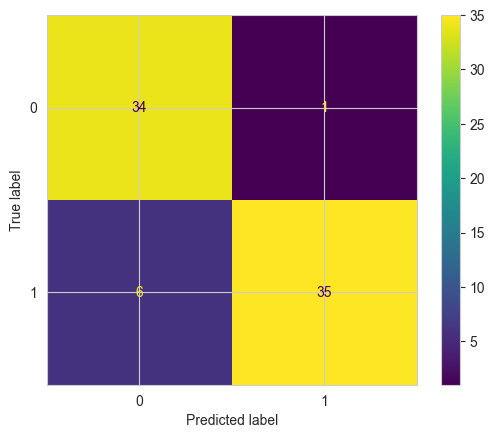

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

In [20]:
# Compute the accuracy score (same as the score() method for classifiers) 
accuracy_score(y_test, y_preds)

0.9078947368421053

# Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)

    # Measure the model score on a single train/test split
    model_score = model.score(X_test, y_test)
    print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")
    
    # Measure the mean cross-validation score across 5 different train and test splits
    cross_val_mean = np.mean(cross_val_score(model, X, y, cv=5))
    print(f"5-fold cross-validation score: {cross_val_mean * 100:.2f}%")
    
    print("")

Trying model with 100 estimators...
Model accuracy on single test set split: 89.47%
5-fold cross-validation score: 82.15%

Trying model with 110 estimators...
Model accuracy on single test set split: 86.84%
5-fold cross-validation score: 81.17%

Trying model with 120 estimators...
Model accuracy on single test set split: 90.79%
5-fold cross-validation score: 83.16%

Trying model with 130 estimators...
Model accuracy on single test set split: 90.79%
5-fold cross-validation score: 83.14%

Trying model with 140 estimators...
Model accuracy on single test set split: 88.16%
5-fold cross-validation score: 82.48%

Trying model with 150 estimators...
Model accuracy on single test set split: 88.16%
5-fold cross-validation score: 80.17%

Trying model with 160 estimators...
Model accuracy on single test set split: 90.79%
5-fold cross-validation score: 80.83%

Trying model with 170 estimators...
Model accuracy on single test set split: 88.16%
5-fold cross-validation score: 81.83%

Trying model wit

# Cross Validation & Grid Search

In [23]:
# Another way to do it with GridSearchCV...

from sklearn.model_selection import GridSearchCV

# Define the parameters to search over in dictionary form 
# (these can be any of your target model's hyperparameters) 
param_grid = {'n_estimators': [i for i in range(100, 200, 10)]}

# Setup the grid search
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=param_grid,
                    cv=5,
                    verbose=1) 

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
print(f"The best parameter values are: {grid.best_params_}")
print(f"With a score of: {grid.best_score_*100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameter values are: {'n_estimators': 120}
With a score of: 83.48%


In [25]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=120)

# Save & Load

In [28]:
import pickle

# Save an existing model to file
pickle.dump(clf, open("../assets/random_forest_model_1.pkl", "wb"))

In [27]:
# Load a saved pickle model and evaluate it
loaded_pickle_model = pickle.load(open("../assets/random_forest_model_1.pkl", "rb"))
print(f"Loaded model prediction score: {loaded_pickle_model.score(X_test, y_test) * 100:.2f}%")

Loaded pickle model prediction score: 100.00%
